In [1]:
import matplotlib.pyplot as plt

import cv2

import numpy as np

import pandas as pd

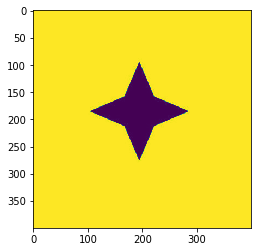

In [2]:
template = cv2.imread('./Section4Images/4Star.jpg')

original = template.copy()

template = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)

plt.imshow(template)

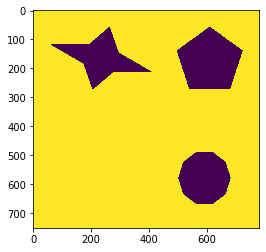

In [3]:
target = cv2.imread('./Section4Images/ShapesToMatch.jpg')

target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)

plt.imshow(target_gray)

0.13081816783853514
0.1590200533978871
0.1498791568252558
0.07094034474475601


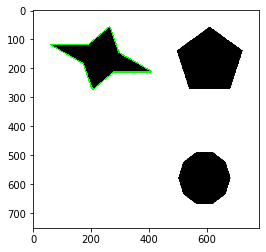

In [4]:
# Threshold both images first before using cv2.findContours

ret, thresh1 = cv2.threshold(template, 127, 255, 0)

ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)

# Find contours in template

contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# We need to sort the contours by area so that we can remove the largest
# contour which is the image outline

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# We extract the second largest contour which will be our template contour

template_contour = contours[1]

# Extract contours from second target image

contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for c in contours :
    
    # Iterate through each contour in the target image and 
    # use cv2.matchShapes to compare contour shapes
    
    match = cv2.matchShapes(template_contour, c, 3, 0.0)
    
    print(match)
    
    # If the match value is less than 0.15 we
    
    if match < 0.15 :
        
        closest_contour = c
        
    else :
        
        closest_contour = [] 
                
cv2.drawContours(target, [closest_contour], -1, (0,255,0), 3)

plt.imshow(target)